In [76]:
import pandas as pd
import matplotlib.pyplot as plt


In [77]:
results = []
for i in range(10,4096,10):
    results.append(pd.read_pickle(f'results___{i}'))
df = pd.concat(results).dropna().drop(columns='Processing Time')
df

,Combination,Average RMSE,RMSE StDev,Average MAE,Median Absolute Error
0,[160438],1.492938,0.376396,1.186745,1.000000
4,"[164179, 160438]",1.049882,0.719879,0.987236,1.000000
6,"[164179, 1304, 160438]",1.127846,0.486104,1.083333,1.000000
8,"[109487, 160438]",1.247354,0.738879,1.109538,1.000000
9,"[109487, 1304]",1.952070,0.347091,1.608964,1.500000
...,...,...,...,...,...
5,"[527, 1961, 344, 586, 457, 142488, 1258, 16825...",1.386359,0.235189,1.072670,0.816667
6,"[527, 1961, 344, 586, 457, 142488, 1258, 16825...",1.330590,0.291274,1.014934,0.750000
7,"[527, 1961, 344, 586, 457, 142488, 1258, 16825...",1.192346,0.278975,0.943532,0.750000
8,"[527, 1961, 344, 586, 457, 142488, 1258, 16825...",1.069004,0.284800,0.847267,0.500000


In [78]:
number_of_elements = []
for i in range(len(df)):
    combo = df.iloc[i,0]
    l = len(combo)
    number_of_elements.append(l)
df["number_of_elements"] = number_of_elements
df

,Combination,Average RMSE,RMSE StDev,Average MAE,Median Absolute Error,number_of_elements
0,[160438],1.492938,0.376396,1.186745,1.000000,1
4,"[164179, 160438]",1.049882,0.719879,0.987236,1.000000,2
6,"[164179, 1304, 160438]",1.127846,0.486104,1.083333,1.000000,3
8,"[109487, 160438]",1.247354,0.738879,1.109538,1.000000,2
9,"[109487, 1304]",1.952070,0.347091,1.608964,1.500000,2
...,...,...,...,...,...,...
5,"[527, 1961, 344, 586, 457, 142488, 1258, 16825...",1.386359,0.235189,1.072670,0.816667,10
6,"[527, 1961, 344, 586, 457, 142488, 1258, 16825...",1.330590,0.291274,1.014934,0.750000,11
7,"[527, 1961, 344, 586, 457, 142488, 1258, 16825...",1.192346,0.278975,0.943532,0.750000,9
8,"[527, 1961, 344, 586, 457, 142488, 1258, 16825...",1.069004,0.284800,0.847267,0.500000,10


In [79]:
best_combo = [527, 344, 586, 142488, 1258, 168250, 109487, 164179, 1304, 160438]
best_combo_RMSE_MAE = [344, 457, 142488, 1258, 168250, 109487, 1304, 160438]
our_combo = [527, 344, 142488, 1258, 109487, 1304]

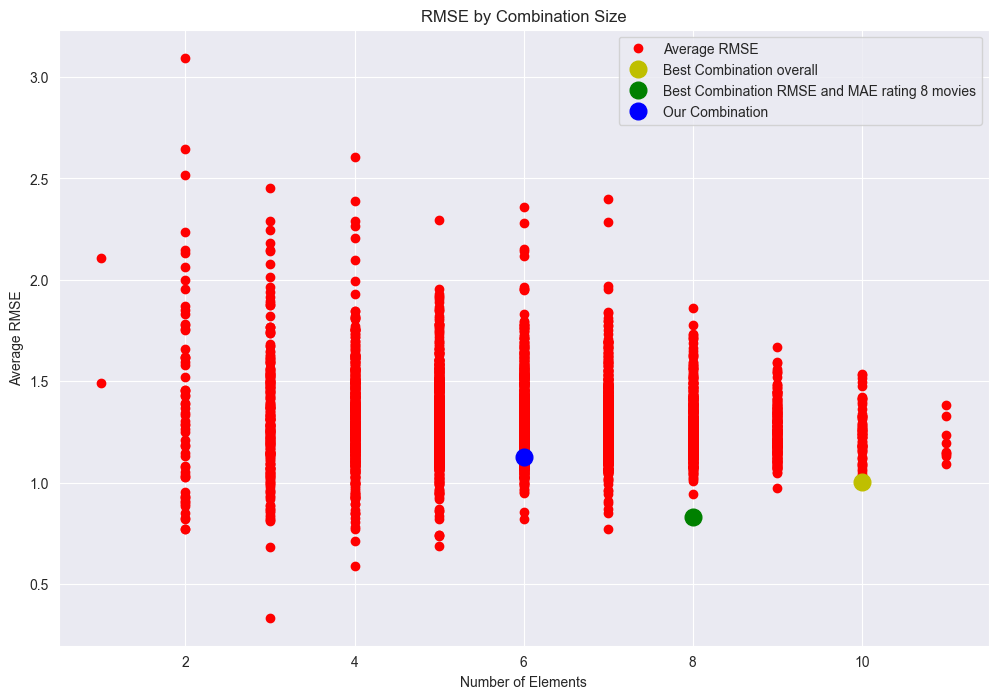

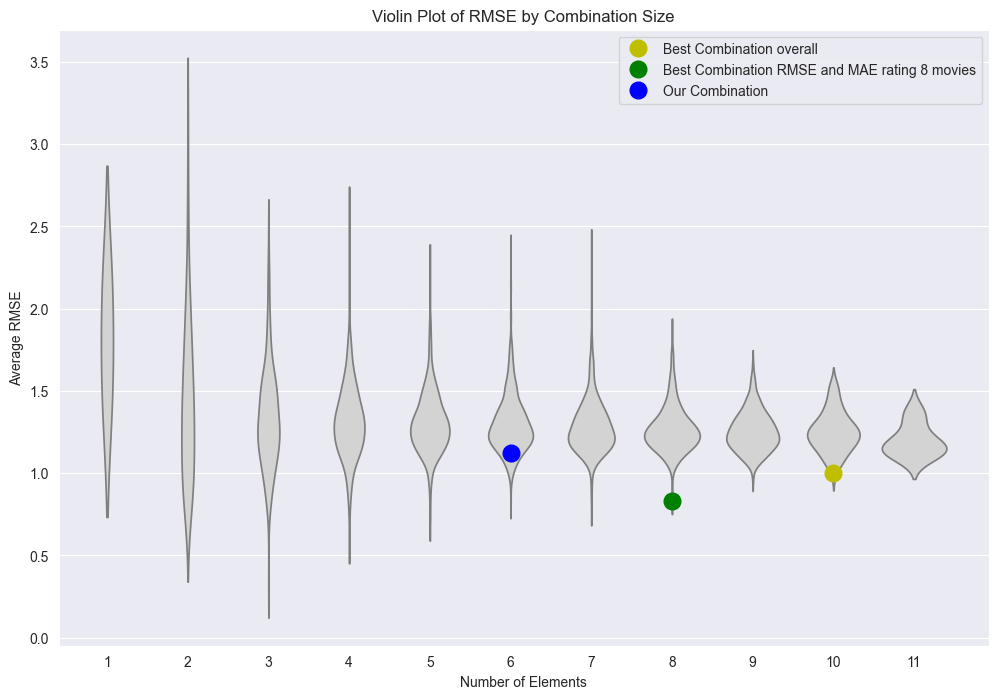

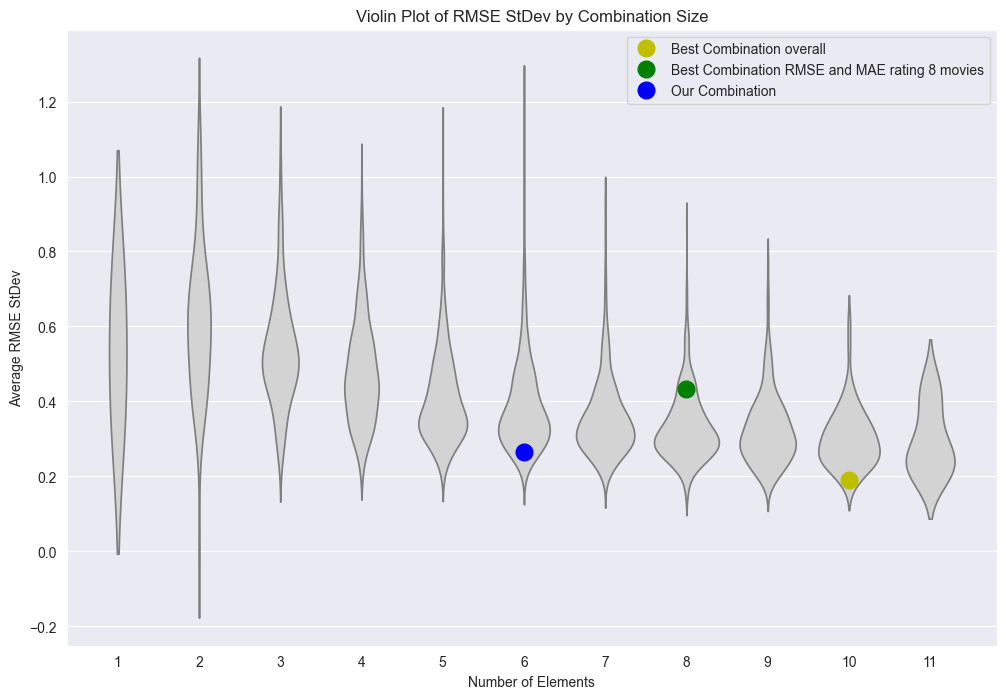

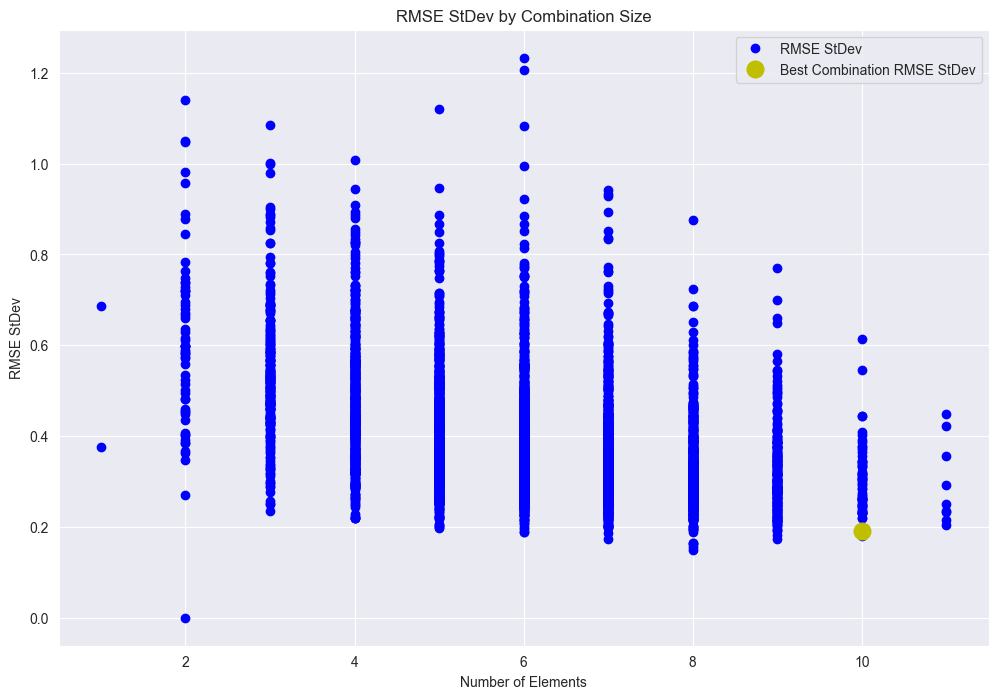

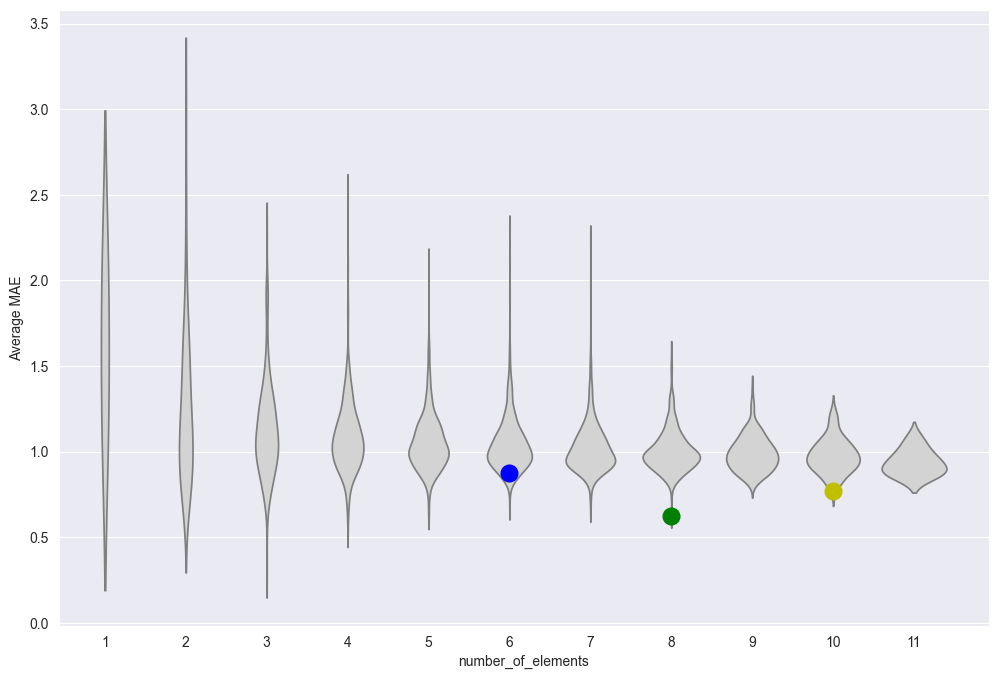

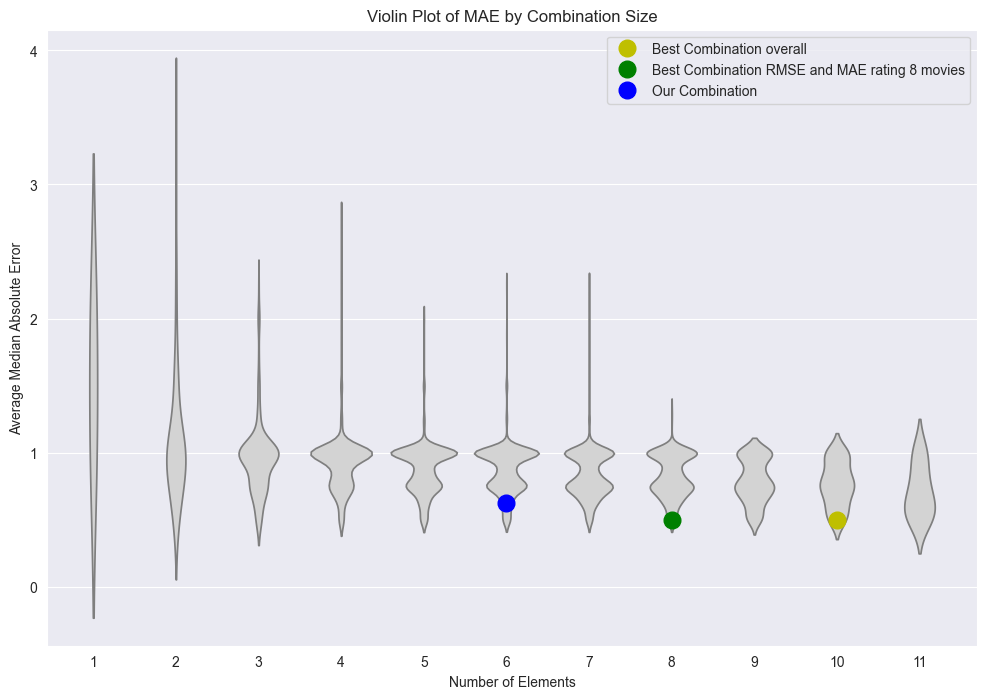

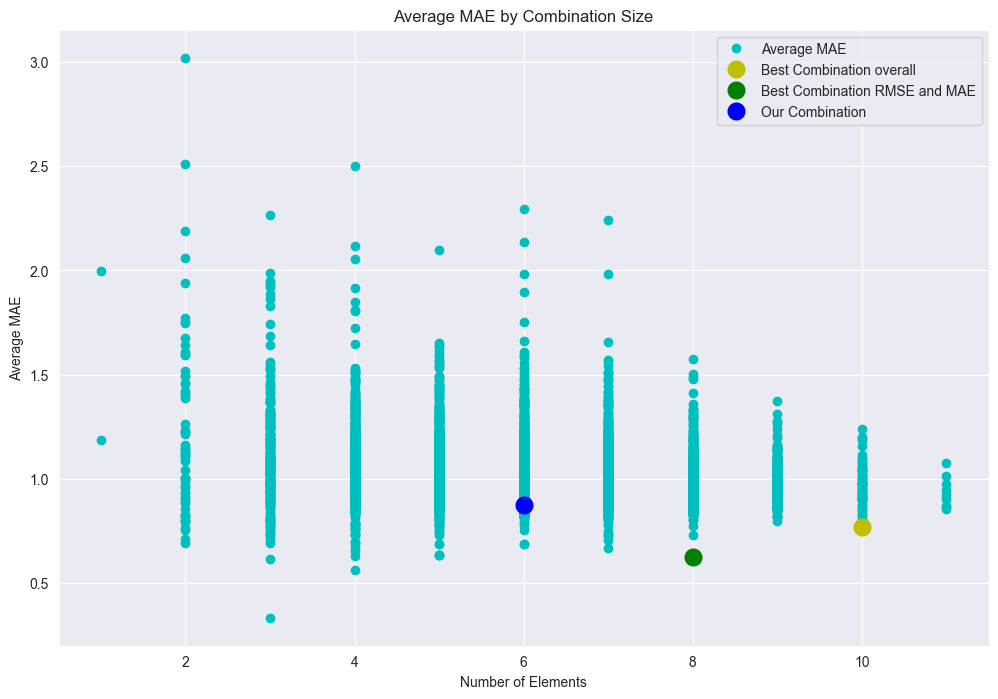

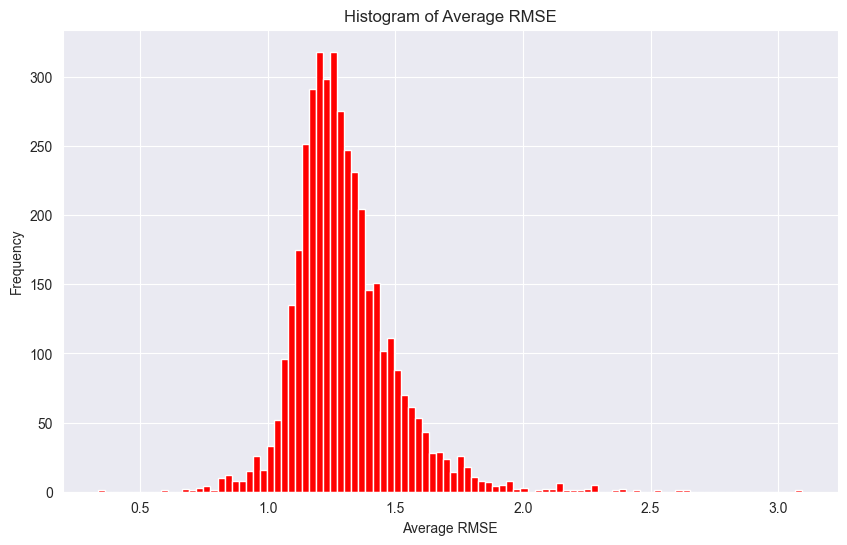

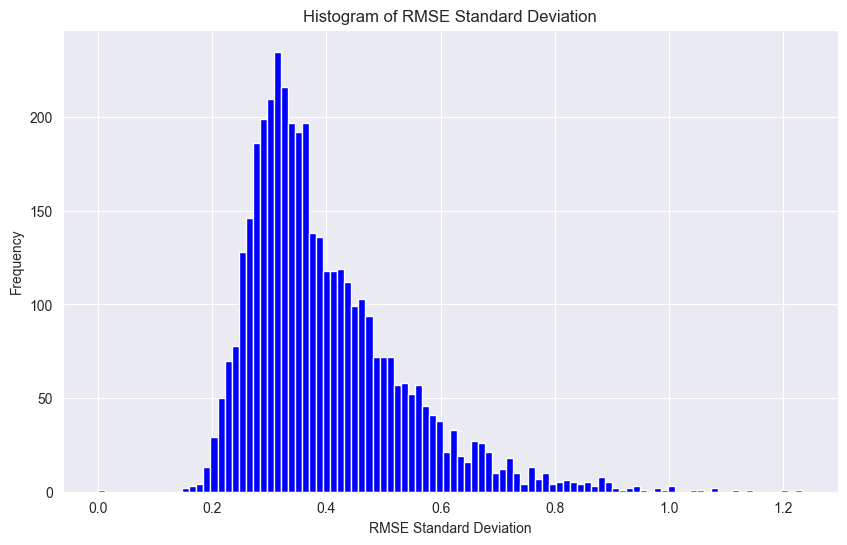

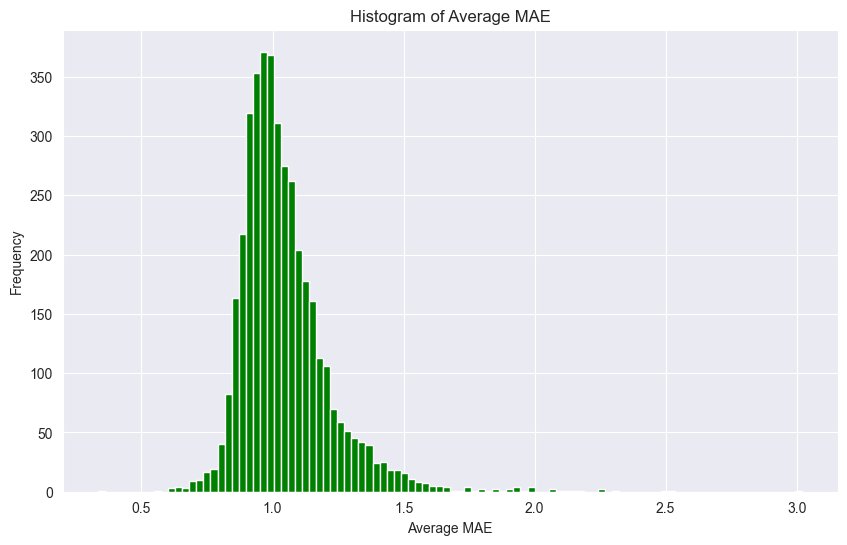

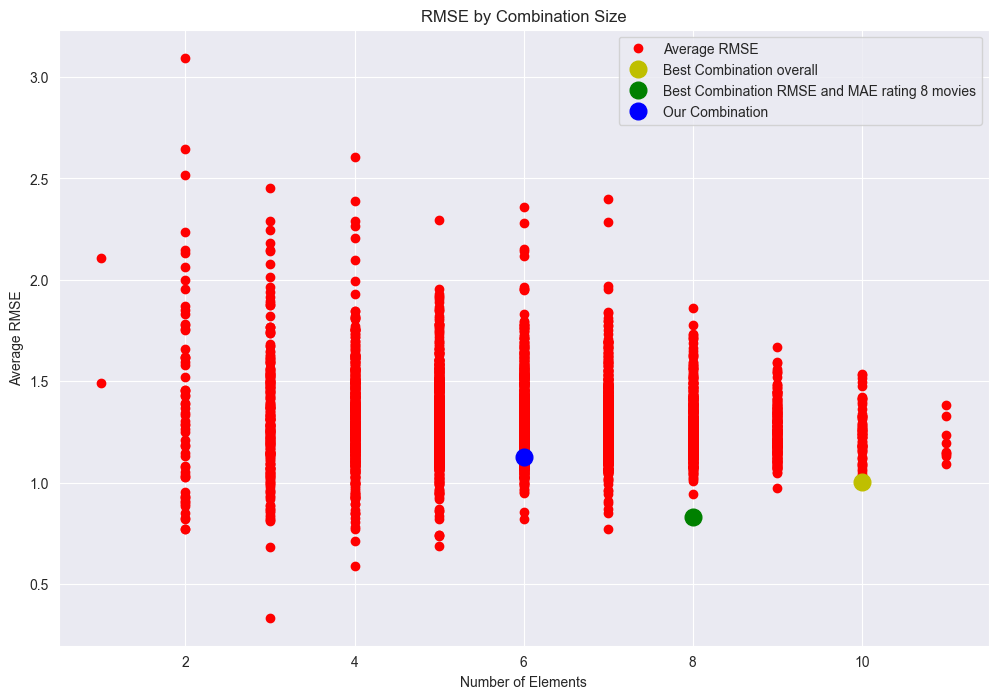

In [89]:
import matplotlib.pyplot as plt

# Convert 'best_combo' to a tuple for easier comparison
best_combo_tuple = tuple(best_combo)
best_combo_RMSE_tuple = tuple(best_combo_RMSE_MAE)
our_combo_tuple = tuple(our_combo)

# Add a new column to the DataFrame with tuple versions of the combinations
df['Combination Tuple'] = df['Combination'].apply(tuple)
df['RMSE Combination Tuple'] = df['Combination'].apply(tuple)
df['our Combination Tuple'] = df['Combination'].apply(tuple)
# Find matching rows in DataFrame
mask = df['Combination Tuple'] == best_combo_tuple
mask1 = df['RMSE Combination Tuple'] == best_combo_RMSE_tuple
mask2 = df['our Combination Tuple'] == our_combo_tuple
# Start plotting
plt.figure(figsize=(12, 8))
plt.plot(df["number_of_elements"], df["Average RMSE"], 'ro', label='Average RMSE')
plt.plot(df[mask]['number_of_elements'], df[mask]['Average RMSE'], 'yo', markersize=12, label='Best Combination overall')
plt.plot(df[mask1]['number_of_elements'], df[mask1]['Average RMSE'], 'go', markersize=12, label='Best Combination RMSE and MAE rating 8 movies')
plt.plot(df[mask2]['number_of_elements'], df[mask2]['Average RMSE'], 'bo', markersize=12, label='Our Combination')
plt.xlabel('Number of Elements')
plt.ylabel('Average RMSE')
plt.title('RMSE by Combination Size')
plt.legend()
plt.show()

import seaborn as sns
# Prepare the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='number_of_elements', y='Average RMSE', data=df, inner=None, color='lightgray')

# Highlight the best combination within the violin plot
plt.plot(df[mask]['number_of_elements']-1, df[mask]['Average RMSE'], 'yo', markersize=12, label='Best Combination overall')
plt.plot(df[mask1]['number_of_elements']-1, df[mask1]['Average RMSE'], 'go', markersize=12, label='Best Combination RMSE and MAE rating 8 movies')
plt.plot(df[mask2]['number_of_elements']-1, df[mask2]['Average RMSE'], 'bo', markersize=12, label='Our Combination')
#print(df.sort_values(by="number_of_elements", ascending=False))

# Adding labels and title
plt.xlabel('Number of Elements')
plt.ylabel('Average RMSE')
plt.title('Violin Plot of RMSE by Combination Size')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(x='number_of_elements', y='RMSE StDev', data=df, inner=None, color='lightgray')

# Highlight the best combination within the violin plot
plt.plot(df[mask]['number_of_elements']-1, df[mask]['RMSE StDev'], 'yo', markersize=12, label='Best Combination overall')
plt.plot(df[mask1]['number_of_elements']-1, df[mask1]['RMSE StDev'], 'go', markersize=12, label='Best Combination RMSE and MAE rating 8 movies')
plt.plot(df[mask2]['number_of_elements']-1, df[mask2]['RMSE StDev'], 'bo', markersize=12, label='Our Combination')
#print(df.sort_values(by="number_of_elements", ascending=False))

# Adding labels and title
plt.xlabel('Number of Elements')
plt.ylabel('Average RMSE StDev')
plt.title('Violin Plot of RMSE StDev by Combination Size')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(df["number_of_elements"], df["RMSE StDev"], 'bo', label='RMSE StDev')
plt.plot(df[mask]['number_of_elements'], df[mask]['RMSE StDev'], 'yo', markersize=12, label='Best Combination RMSE StDev')
plt.xlabel('Number of Elements')
plt.ylabel('RMSE StDev')
plt.title('RMSE StDev by Combination Size')
plt.legend()
plt.show()

# Prepare the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='number_of_elements', y='Average MAE', data=df, inner=None, color='lightgray')

# Highlight the best combination within the violin plot
plt.plot(df[mask]['number_of_elements']-1, df[mask]['Average MAE'], 'yo', markersize=12, label='Best Combination overall')
plt.plot(df[mask1]['number_of_elements']-1, df[mask1]['Average MAE'], 'go', markersize=12, label='Best Combination RMSE and MAE rating 8 movies')
plt.plot(df[mask2]['number_of_elements']-1, df[mask2]['Average MAE'], 'bo', markersize=12, label='Our Combination')
#print(df.sort_values(by="number_of_elements", ascending=False))

# Prepare the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='number_of_elements', y='Median Absolute Error', data=df, inner=None, color='lightgray')

# Highlight the best combination within the violin plot
plt.plot(df[mask]['number_of_elements']-1, df[mask]["Median Absolute Error"], 'yo', markersize=12, label='Best Combination overall')
plt.plot(df[mask1]['number_of_elements']-1, df[mask1]["Median Absolute Error"], 'go', markersize=12, label='Best Combination RMSE and MAE rating 8 movies')
plt.plot(df[mask2]['number_of_elements']-1, df[mask2]["Median Absolute Error"], 'bo', markersize=12, label='Our Combination')

# Adding labels and title
plt.xlabel('Number of Elements')
plt.ylabel('Average Median Absolute Error')
plt.title('Violin Plot of MAE by Combination Size')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(df["number_of_elements"], df["Average MAE"], 'co', label='Average MAE')
plt.plot(df[mask]['number_of_elements'], df[mask]['Average MAE'], 'yo', markersize=12, label='Best Combination overall')
plt.plot(df[mask1]['number_of_elements'], df[mask1]['Average MAE'], 'go', markersize=12, label='Best Combination RMSE and MAE')
plt.plot(df[mask2]['number_of_elements'], df[mask2]['Average MAE'], 'bo', markersize=12, label='Our Combination')
plt.xlabel('Number of Elements')
plt.ylabel('Average MAE')
plt.title('Average MAE by Combination Size')
plt.legend()
plt.show()

# Histogram for Average RMSE
plt.figure(figsize=(10, 6))
plt.hist(df["Average RMSE"], bins=100, color='red')
plt.xlabel('Average RMSE')
plt.ylabel('Frequency')
plt.title('Histogram of Average RMSE')
plt.show()

# Histogram for RMSE Standard Deviation
plt.figure(figsize=(10, 6))
plt.hist(df["RMSE StDev"], bins=100, color='blue')
plt.xlabel('RMSE Standard Deviation')
plt.ylabel('Frequency')
plt.title('Histogram of RMSE Standard Deviation')
plt.show()

# Histogram for Average MAE
plt.figure(figsize=(10, 6))
plt.hist(df["Average MAE"], bins=100, color='green')
plt.xlabel('Average MAE')
plt.ylabel('Frequency')
plt.title('Histogram of Average MAE')
plt.show()

plt.figure(figsize=(12, 8))
plt.plot(df["number_of_elements"], df["Average RMSE"], 'ro', label='Average RMSE')
plt.plot(df[mask]['number_of_elements'], df[mask]['Average RMSE'], 'yo', markersize=12, label='Best Combination overall')
plt.plot(df[mask1]['number_of_elements'], df[mask1]['Average RMSE'], 'go', markersize=12, label='Best Combination RMSE and MAE rating 8 movies')
plt.plot(df[mask2]['number_of_elements'], df[mask2]['Average RMSE'], 'bo', markersize=12, label='Our Combination')
plt.xlabel('Number of Elements')
plt.ylabel('Average RMSE')
plt.title('RMSE by Combination Size')
plt.legend()
plt.show()

In [81]:
df[mask]

,Combination,Average RMSE,RMSE StDev,Average MAE,Median Absolute Error,number_of_elements,Combination Tuple,RMSE Combination Tuple,our Combination Tuple
2,"[527, 344, 586, 142488, 1258, 168250, 109487, ...",1.0011,0.191305,0.769969,0.5,10,"(527, 344, 586, 142488, 1258, 168250, 109487, ...","(527, 344, 586, 142488, 1258, 168250, 109487, ...","(527, 344, 586, 142488, 1258, 168250, 109487, ..."


In [82]:
df[mask1]

,Combination,Average RMSE,RMSE StDev,Average MAE,Median Absolute Error,number_of_elements,Combination Tuple,RMSE Combination Tuple,our Combination Tuple
2,"[344, 457, 142488, 1258, 168250, 109487, 1304,...",0.830347,0.431946,0.624275,0.5,8,"(344, 457, 142488, 1258, 168250, 109487, 1304,...","(344, 457, 142488, 1258, 168250, 109487, 1304,...","(344, 457, 142488, 1258, 168250, 109487, 1304,..."


In [83]:
df[mask2]

,Combination,Average RMSE,RMSE StDev,Average MAE,Median Absolute Error,number_of_elements,Combination Tuple,RMSE Combination Tuple,our Combination Tuple
5,"[527, 344, 142488, 1258, 109487, 1304]",1.123989,0.264327,0.872029,0.625,6,"(527, 344, 142488, 1258, 109487, 1304)","(527, 344, 142488, 1258, 109487, 1304)","(527, 344, 142488, 1258, 109487, 1304)"


In [84]:
# Calculate descriptive statistics for each combination
desc_stats = df.describe()

# Trade-off analysis: Considering both RMSE and MAE, and their variabilities
print("Descriptive Statistics:")
print(desc_stats)




Descriptive Statistics:
       Average RMSE   RMSE StDev  Average MAE  Median Absolute Error  \
count   4073.000000  4073.000000  4073.000000            4073.000000   
mean       1.298956     0.397330     1.045705               0.864735   
std        0.197267     0.135778     0.178198               0.199669   
min        0.333333     0.000000     0.333333               0.500000   
25%        1.179276     0.302252     0.934597               0.750000   
50%        1.267489     0.362925     1.009728               0.875000   
75%        1.386359     0.463309     1.117039               1.000000   
max        3.094998     1.233300     3.021189               3.500000   

       number_of_elements  
count         4073.000000  
mean             6.013749  
std              1.701094  
min              1.000000  
25%              5.000000  
50%              6.000000  
75%              7.000000  
max             11.000000  


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.,   3.,   4.,  13.,  29.,  50.,  70.,  78., 128., 146.,
        186., 199., 210., 235., 216., 197., 192., 197., 138., 136., 118.,
        118., 119., 112.,  99., 103.,  94.,  72.,  72.,  72.,  57.,  58.,
         52.,  57.,  46.,  41.,  38.,  21.,  33.,  19.,  16.,  27.,  26.,
         21.,  10.,  12.,  18.,  10.,   4.,  13.,   7.,  10.,   4.,   5.,
          6.,   5.,   4.,   5.,   3.,   8.,   5.,   2.,   1.,   2.,   3.,
          1.,   0.,   2.,   1.,   3.,   0.,   0.,   1.,   1.,   0.,   2.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.]),
 array([0.        , 0.012333  , 0.02466601, 0.03699901, 0.04933202,
        0.06166502, 0.07399803, 0.08633103, 0.09866404, 0.11099704,
        0.12333005, 0.13566305, 0.14799606, 0.16032906, 0.17266207,
        0.18499507, 0.19732808, 0.20966108, 0.22199409, 0.23432709,
        0.2466601 , 0.2589931 , 0.2713261 , 0.

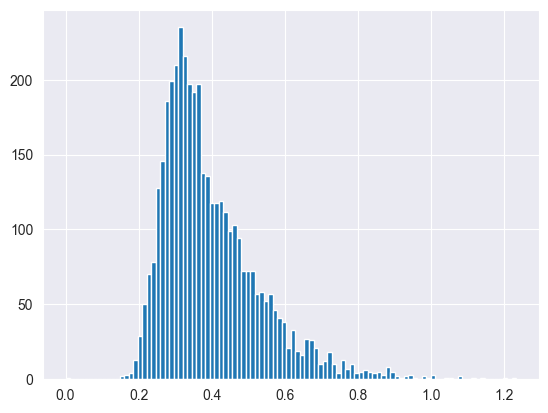

In [85]:
plt.hist(df["RMSE StDev"], bins=100)

In [86]:
import pandas as pd
df_movies = pd.read_csv('ml-latest/movies.csv')
df_sorted = df.sort_values(by='RMSE StDev', ascending=True)
df_1_pct = df_sorted.copy().iloc[:int(len(df_sorted)/100)]
#print(df_1_pct)

best_combinations_rmse_mae = [df_1_pct.sort_values(by='Average RMSE').iloc[0]["Combination"], df_1_pct.sort_values(by='Average MAE').iloc[0]["Combination"]]
print(f"Best combinations RMSE, MAE: {best_combinations_rmse_mae}")



final_titles = [df_movies[df_movies['movieId'] == id][['title', 'genres']].values[0] for id in best_combinations_rmse_mae[0]]
print(f'final titles -> {final_titles}')

Best combinations RMSE, MAE: [[527, 344, 586, 142488, 1258, 168250, 109487, 164179, 1304, 160438], [527, 344, 586, 142488, 1258, 168250, 109487, 164179, 1304, 160438]]
final titles -> [array(["Schindler's List (1993)", 'Drama|War'], dtype=object), array(['Ace Ventura: Pet Detective (1994)', 'Comedy'], dtype=object), array(['Home Alone (1990)', 'Children|Comedy'], dtype=object), array(['Spotlight (2015)', 'Thriller'], dtype=object), array(['Shining, The (1980)', 'Horror'], dtype=object), array(['Get Out (2017)', 'Horror'], dtype=object), array(['Interstellar (2014)', 'Sci-Fi|IMAX'], dtype=object), array(['Arrival (2016)', 'Sci-Fi'], dtype=object), array(['Butch Cassidy and the Sundance Kid (1969)', 'Action|Western'],
      dtype=object), array(['Jason Bourne (2016)', 'Action'], dtype=object)]


In [87]:
for i in df[mask]["Combination"].values[0]:
    print(df_movies[df_movies['movieId']==i])

     movieId                    title     genres
522      527  Schindler's List (1993)  Drama|War
     movieId                              title  genres
339      344  Ace Ventura: Pet Detective (1994)  Comedy
     movieId              title           genres
578      586  Home Alone (1990)  Children|Comedy
       movieId             title    genres
33408   142488  Spotlight (2015)  Thriller
      movieId                title  genres
1225     1258  Shining, The (1980)  Horror
       movieId           title  genres
44997   168250  Get Out (2017)  Horror
       movieId                title       genres
21212   109487  Interstellar (2014)  Sci-Fi|IMAX
       movieId           title  genres
43084   164179  Arrival (2016)  Sci-Fi
      movieId                                      title          genres
1270     1304  Butch Cassidy and the Sundance Kid (1969)  Action|Western
       movieId                title  genres
41293   160438  Jason Bourne (2016)  Action


In [90]:
for i in df[mask2]["Combination"].values[0]:
    print(df_movies[df_movies['movieId']==i])

     movieId                    title     genres
522      527  Schindler's List (1993)  Drama|War
     movieId                              title  genres
339      344  Ace Ventura: Pet Detective (1994)  Comedy
       movieId             title    genres
33408   142488  Spotlight (2015)  Thriller
      movieId                title  genres
1225     1258  Shining, The (1980)  Horror
       movieId                title       genres
21212   109487  Interstellar (2014)  Sci-Fi|IMAX
      movieId                                      title          genres
1270     1304  Butch Cassidy and the Sundance Kid (1969)  Action|Western
